In [155]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#Combine the data into a single dataset
combined_df = pd.merge(city_data, ride_data,
                                 how='outer', on='city')
# Display the data table for preview
combined_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

The higher the driver count, the larger the circle size on City Type Data Chart


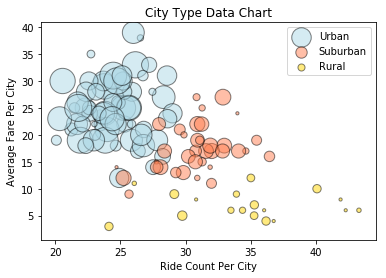

In [157]:
u = combined_df[combined_df['type'] == "Urban"]
s = combined_df[combined_df['type'] == "Suburban"]
r = combined_df[combined_df['type'] == "Rural"]

u_ride_count = u.groupby('city').count()['ride_id']
s_ride_count = s.groupby('city').count()['ride_id']
r_ride_count = r.groupby('city').count()['ride_id']

u_avg_fare = u.groupby('city').mean()['fare']
s_avg_fare = s.groupby('city').mean()['fare']
r_avg_fare = r.groupby('city').mean()['fare']

u_drive_count = u.groupby('city').mean()['driver_count']
s_drive_count = s.groupby('city').mean()['driver_count']
r_drive_count = r.groupby('city').mean()['driver_count']

plt.scatter(u_avg_fare, u_ride_count, s=10 * u_drive_count, c='lightblue', edgecolor='black',
            alpha=0.5, label='Urban')
plt.scatter(s_avg_fare, s_ride_count, s=10 * s_drive_count, c='coral', edgecolor='black',
            alpha=0.5, label='Suburban')
plt.scatter(r_avg_fare, r_ride_count, s=10 * r_drive_count, c='gold', edgecolor='black',
            alpha=0.5, label='Rural')

plt.title("City Type Data Chart")
plt.ylabel("Average Fare Per City")
plt.xlabel("Ride Count Per City")
plt.legend(loc='upper right')

print("The higher the driver count, the larger the circle size on City Type Data Chart")

plt.show()

In [158]:
# Save Figure
# Save Figure
plt.savefig("../City_type_bubble_plot")


In [159]:
# Show plot
plt.show()

## Total Fares by City Type

In [183]:
# Calculate Type Percents
fare_total = combined_df['fare'].sum()

fare_group = combined_df.groupby('type')
total_fares = fare_group['fare'].sum()

rural_perc = fare_total / total_fares['Rural']

suburban_perc = fare_total / total_fares['Suburban']

urban_perc = fare_total / total_fares['Urban']

# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
types = [rural_perc, suburban_perc, urban_perc]

# The colors of each section of the pie chart
colors = ["lightskyblue", "lightcoral", "gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)


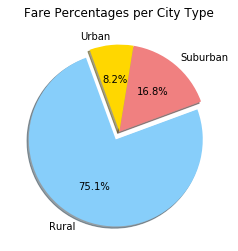

<Figure size 432x288 with 0 Axes>

In [190]:
# Show Figure

plt.pie(types, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=110)
plt.title("Fare Percentages per City Type")
plt.show()

# Save Figure
plt.savefig("../Images/Fares_pie_chart")


## Total Rides by City Type

In [185]:
# Calculate Ride Percents
# % of Total Fares by City Type
ride_totals = combined_df['ride_id'].count()
print(ride_totals)
ride_total = fare_group['ride_id'].count()

rural = ride_totals / ride_total['Rural']
suburban = ride_totals / ride_total['Suburban']
urban = ride_totals / ride_total['Urban']
# Build Pie Chart

label = ['Rural', 'Suburban', 'Urban'] 

ride = [rural, suburban, urban]

color = ["lightskyblue", "lightcoral", "gold"]


2375


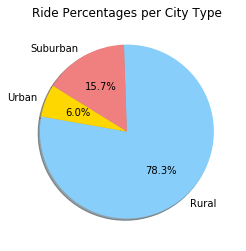

In [186]:
# Show Figure
plt.pie(ride, explode=None, labels=label, colors=color, autopct="%1.1f%%", shadow=True, startangle=170)

plt.title("Ride Percentages per City Type")
plt.show()


# Save Figure
plt.savefig("../Images/Ride_totals_pie_chart")

## Total Drivers by City Type

In [194]:
# Calculate Driver Percents
drivers = combined_df.groupby('city').mean()['driver_count']
total_drivers = drivers.sum()


u_drive_count = u.groupby('city').mean()['driver_count']
urban_total = u_drive_count.sum()

s_drive_count = s.groupby('city').mean()['driver_count']
suburban_total = s_drive_count.sum()

r_drive_count = r.groupby('city').mean()['driver_count']
rural_total = r_drive_count.sum()


perc_u = urban_total / total_drivers
perc_s =suburban_total / total_drivers
perc_r = rural_total / total_drivers

# Build Pie Charts

city_types = ['Urban', 'Suburban', 'Rural'] 

driver_percs = [perc_u, perc_s, perc_r]

color = ["lightskyblue", "lightcoral", "gold"]

# Save Figure


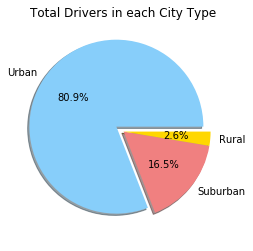

In [197]:
# Show Figure
plt.pie(driver_percs, explode=explode, labels=city_types, colors=color, autopct="%1.1f%%", shadow=True)
plt.title("Total Drivers in each City Type")

plt.show()

In [189]:
plt.savefig("../Images/Total_drivers_pie_chart")
plt.show()

<Figure size 432x288 with 0 Axes>

In [ ]:
# Observations:
#     1) Urban citys have the highest number of drivers, but the lowest number of rides and ride fare total.
#         However the fare prices in Urban cities are high compared to rural and susrban, which may be attractive 
#         to drivers, resulting in a high driver count
#     2) Rural cities have the lowest number of drivers and highest number of rides and ride fare totals, potentially making
#         it a 'drivers market'. However fare prices seem to not be affected by the high ride count and low driver count
#     3)Suburban cities have a seemingly neutral market, with a consistent amount of drivers to number of rides. Fares
#        in suburban cities are in between prices in Urban and Rural cities